In [14]:
## Imports
import pandas as pd
import numpy as np
import random

In [15]:
## Create data
data = pd.DataFrame(
                  [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
                   ], columns = ['cgpa',	'iq',	'is_placed']
)

data

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


In [16]:
## Count 0's and 1's
print("Number of 1's=",data['is_placed'].value_counts()[1])
print("Number of 0's=",data['is_placed'].value_counts()[0])

Number of 1's= 5
Number of 0's= 3


In [17]:
## Create new column for f0(x)
data['pre1(log-odds)']=np.log(data['is_placed'].value_counts()[1]/data['is_placed'].value_counts()[0])
data

,cgpa,iq,is_placed,pre1(log-odds)
0,6.82,118,0,0.510826
1,6.36,125,1,0.510826
2,5.39,99,1,0.510826
3,5.50,106,1,0.510826
4,6.39,148,0,0.510826
5,9.13,148,1,0.510826
6,7.17,147,1,0.510826
7,7.72,72,0,0.510826


In [18]:
## p=1/(1+e^-(log(odds)))
data['pre1(Probability)']=1/(1+np.exp(-data['pre1(log-odds)']))
data

,cgpa,iq,is_placed,pre1(log-odds),pre1(Probability)
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625
5,9.13,148,1,0.510826,0.625
6,7.17,147,1,0.510826,0.625
7,7.72,72,0,0.510826,0.625


In [19]:
## Calculate residual
data['res1']=data['is_placed']-data['pre1(Probability)']
data

,cgpa,iq,is_placed,pre1(log-odds),pre1(Probability),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625
5,9.13,148,1,0.510826,0.625,0.375
6,7.17,147,1,0.510826,0.625,0.375
7,7.72,72,0,0.510826,0.625,-0.625


In [20]:
## Train Decision tree with cgpa and iq as input and res1 as output.
from sklearn.tree import DecisionTreeRegressor
tree1=DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

# Train
tree1.fit(data.iloc[:,:2].values,data.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

[Text(0.4, 0.8333333333333334, 'x[0] <= 6.375\nsquared_error = 0.234\nsamples = 8\nvalue = 0.0'),
 Text(0.2, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 0.375'),
 Text(0.6, 0.5, 'x[1] <= 132.5\nsquared_error = 0.24\nsamples = 5\nvalue = -0.225'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.0\nsamples = 2\nvalue = -0.625'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.222\nsamples = 3\nvalue = 0.042')]

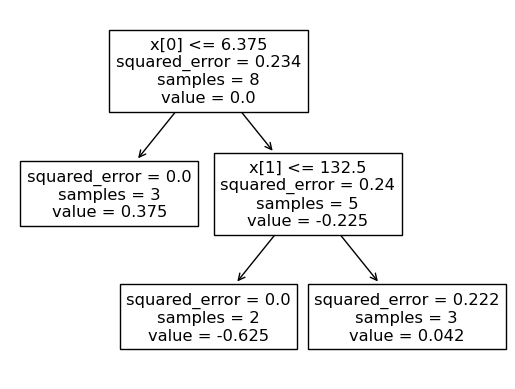

In [21]:
## Visualize the decision tree
from sklearn.tree import plot_tree
plot_tree(tree1)

In [22]:
## Leaf node to which each row belongs
data['leaf_entry1'] = tree1.apply(data.iloc[:,0:2])
data

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(Probability),res1,leaf_entry1
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


In [23]:
## Get pre2(log odds using function)
def return_logs(leaf):
    temp_df=data[data['leaf_entry1']==leaf]
    num=temp_df['res1'].sum()
    den=sum(temp_df['pre1(Probability)']*(1-temp_df['pre1(Probability)']))
    return round(num/den,2)

In [24]:
## Apply the function on each leaf entry
data['pre2(log-odds)']=data['pre1(log-odds)']+data['leaf_entry1'].apply(return_logs)
data

,cgpa,iq,is_placed,pre1(log-odds),pre1(Probability),res1,leaf_entry1,pre2(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174


In [25]:
## For 3rd model we need residual so probability has to be calculated for pre2(log-odds)
data['pre2(Probability)']=1/(1+np.exp(-data['pre2(log-odds)']))
data

,cgpa,iq,is_placed,pre1(log-odds),pre1(Probability),res1,leaf_entry1,pre2(log-odds),pre2(Probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477


In [26]:
## Get residual
data['res2']=data['is_placed']-data['pre2(Probability)']
data

,cgpa,iq,is_placed,pre1(log-odds),pre1(Probability),res1,leaf_entry1,pre2(log-odds),pre2(Probability),res2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477


In [28]:
## Create f3(x) i.e. 3 rd model
tree2= DecisionTreeRegressor(max_leaf_nodes=3)
tree2.fit(data.iloc[:,0:2].values,data.iloc[:,-1].values)

DecisionTreeRegressor(max_leaf_nodes=3)

[Text(0.6, 0.8333333333333334, 'x[0] <= 6.995\nsquared_error = 0.09\nsamples = 8\nvalue = 0.015'),
 Text(0.4, 0.5, 'x[1] <= 136.5\nsquared_error = 0.09\nsamples = 5\nvalue = -0.089'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.008\nsamples = 4\nvalue = 0.055'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = -0.666'),
 Text(0.8, 0.5, 'squared_error = 0.043\nsamples = 3\nvalue = 0.188')]

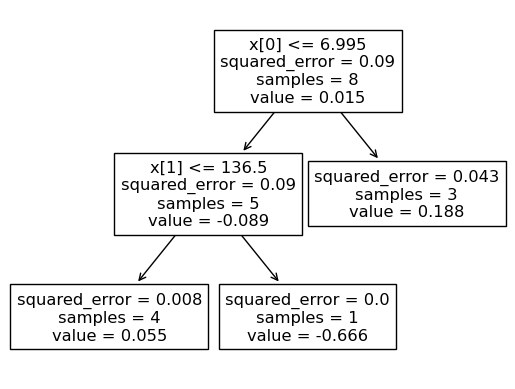

In [29]:
## Visualize DT2
plot_tree(tree2)

In [30]:
data['leaf_entry2'] = tree2.apply(data.iloc[:,0:2])
data

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,cgpa,iq,is_placed,pre1(log-odds),pre1(Probability),res1,leaf_entry1,pre2(log-odds),pre2(Probability),res2,leaf_entry2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2


In [36]:
def return_logs2(leaf):
    temp_df=data[data['leaf_entry2']==leaf]
    num=temp_df['res2'].sum()
    den=sum(temp_df['pre2(Probability)']*(1-temp_df['pre2(Probability)']))
    return round(num/den,2)

In [37]:
## get pre3(log-odds) using return_log function
data['pre3(log-odds)'] = data['pre1(log-odds)'] + data['pre2(log-odds)'] + data['leaf_entry2'].apply(return_logs2)
data

,cgpa,iq,is_placed,pre1(log-odds),pre1(Probability),res1,leaf_entry1,pre2(log-odds),pre2(Probability),res2,leaf_entry2,pre3(log-odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4,-1.798349
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2,-0.598349


In [38]:
## Get probability3
data['pre3(Probability)']=1/(1+np.exp(-data['pre3(log-odds)']))
data

,cgpa,iq,is_placed,pre1(log-odds),pre1(Probability),res1,leaf_entry1,pre2(log-odds),pre2(Probability),res2,leaf_entry2,pre3(log-odds),pre3(Probability)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349,0.255717
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4,-1.798349,0.142052
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2,-0.598349,0.354722
